# EDA on Online Retail Store dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.gridspec as gridspec

In [2]:
# reading data from csv file

df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# checking for nan values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# dropping nan values from the dataset
df = df.dropna()

In [7]:
#checking if there are any missing values left
df.isna().sum().sum()

0

In [8]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

5225

In [9]:
# dropping duplicate rows
df = df.drop_duplicates().reset_index(drop=True)

In [10]:
# checking if any duplicates are left
df.duplicated().sum()

0

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [12]:
# removing rows where values of 'Quantity' and 'UnitPrice' is less than 0

df = df[(df['Quantity']>0) & (df['UnitPrice']>0)]

In [13]:
# checking the final shape of our dataset to start processing on it
df.shape

(392692, 8)

In [14]:
#checking the data type of 'InovoiceDate' column
type(df.InvoiceDate[0])

str

In [15]:
# Converting 'InvoiceDate' string objects to pandas datetime type

df.InvoiceDate = pd.to_datetime(df.InvoiceDate)
df.InvoiceDate.dtype

dtype('<M8[ns]')

In [16]:
# Converting CustomerID to int

df.CustomerID = df.CustomerID.apply(lambda x : int(x))

In [17]:
# calculating 'Amount' column by multiplying  'Quantity' and 'UnitPrice'

df['Amount'] = df.Quantity * df.UnitPrice
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
401603,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


# insights from the data

In [18]:
# checking for the oldest and latest entry in our dataset

print('Latest entry is on:', df.InvoiceDate.max())
print('Oldest entry is from:', df.InvoiceDate.min())

Latest entry is on: 2011-12-09 12:50:00
Oldest entry is from: 2010-12-01 08:26:00


In [19]:
# top ten countries from where the maximum no. of purchases has been made

top_ten_country = df.groupby('InvoiceNo').agg({'Country':'max'}).Country.value_counts()[:11]
top_ten_country

United Kingdom    16646
Germany             457
France              389
EIRE                260
Belgium              98
Netherlands          94
Spain                90
Portugal             57
Australia            57
Switzerland          51
Finland              41
Name: Country, dtype: int64

The sales numbers from differnet countries


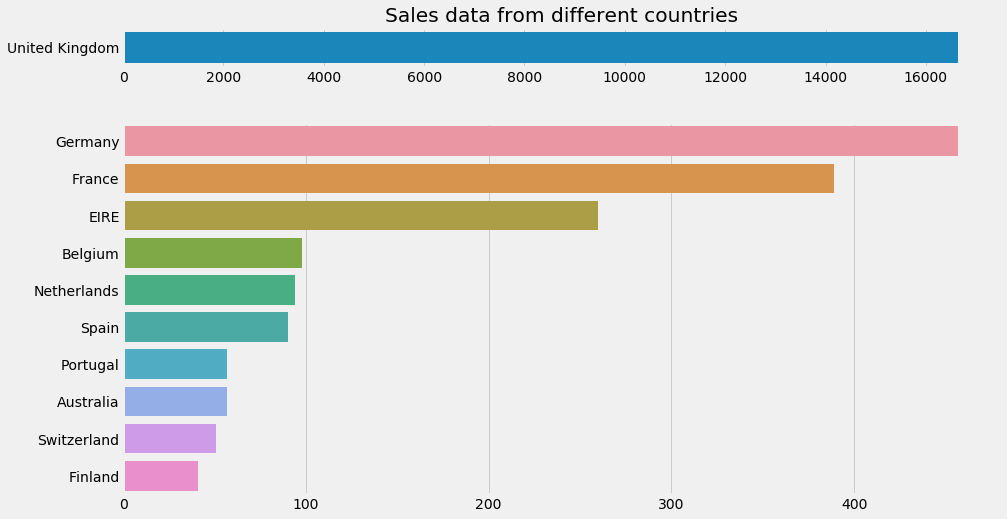

In [20]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 8))
G = gridspec.GridSpec(10, 1)

axes_1 = plt.subplot(G[:1, :]); sns.barplot(y=top_ten_country.index[0:1], x=top_ten_country[0:1], orient='h')
plt.xlabel('')
plt.title('Sales data from different countries')
axes_2 = plt.subplot(G[2:, :]); sns.barplot(y=top_ten_country.index[1:], x=top_ten_country[1:], orient='h')
plt.xlabel('')

print("The sales numbers from differnet countries")

In [21]:
# checking in which month do the customers buy most

month_map = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
byMonth = df.InvoiceDate.apply(lambda date : date.month).reset_index().InvoiceDate.value_counts().sort_index()
byMonth.index = byMonth.index.map(month_map)
byMonth

Jan    20988
Feb    19706
Mar    26870
Apr    22433
May    28073
Jun    26926
Jul    26580
Aug    26790
Sep    39669
Oct    48793
Nov    63168
Dec    42696
Name: InvoiceDate, dtype: int64

Customers' shopping trend


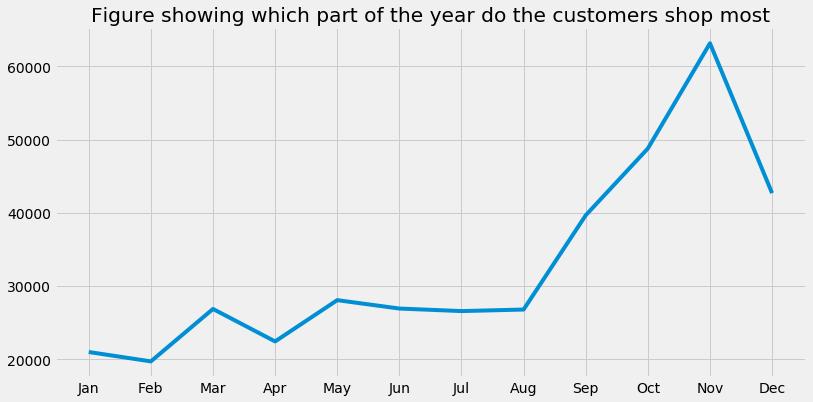

In [22]:
# plotting the above

plt.figure(figsize=(12,6))
plt.plot(byMonth)
plt.title('Figure showing which part of the year do the customers shop most')
print("Customers' shopping trend")

In [23]:
# to see month wise purchase data, we need 'month' and 'year' columns
# it's better to make a copy pf the original dataset, on which we'll perform the reqd. steps

modified_df = df[['Quantity','Amount','InvoiceDate','Country','CustomerID']].copy()
modified_df['Month'] = modified_df['InvoiceDate'].dt.month 
modified_df['Year'] = modified_df['InvoiceDate'].dt.year

by_year_month = modified_df.groupby(['Year','Month']).agg({'Quantity':'sum', 'Amount':'sum', 'CustomerID':'nunique'}).rename(columns={'CustomerID':'No_Of_Customers'})
by_year_month

Quantity       Amount  No_Of_Customers
Year Month                                        
2010 12       311048   570422.730              885
2011 1        348473   568101.310              741
     2        265027   446084.920              758
     3        347582   594081.760              974
     4        291366   468374.331              856
     5        372864   677355.150             1056
     6        363014   660046.050              991
     7        367360   598962.901              949
     8        397373   644051.040              935
     9        543652   950690.202             1266
     10       591543  1035642.450             1364
     11       665923  1156205.610             1664
     12       286777   517190.440              615

Quantity and Total amount spent by customers in different months


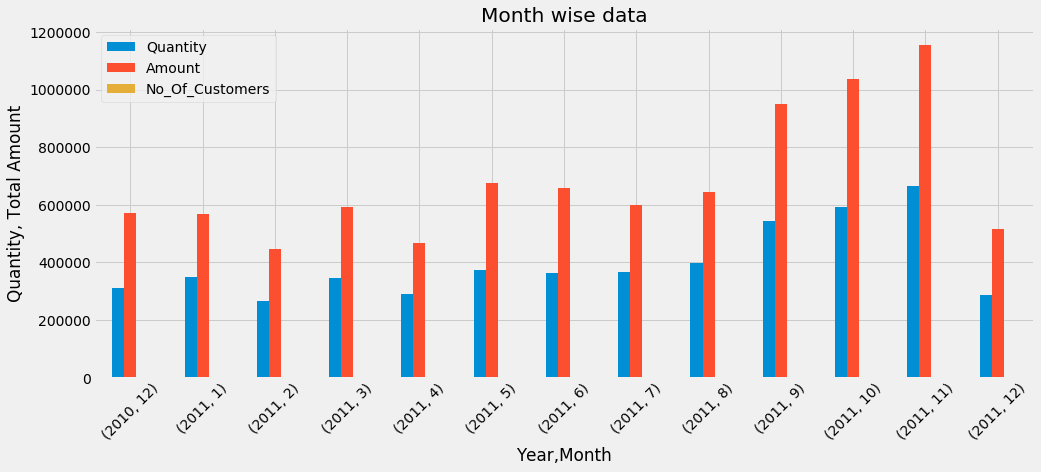

In [24]:
# plotting the month wise data

by_year_month.plot(kind='bar', figsize=(15,6))
plt.ylabel('Quantity, Total Amount')
plt.xticks(rotation=45)
plt.title('Month wise data')
print("Quantity and Total amount spent by customers in different months")

In [25]:
# calculating the amount spent by customers on an average from different countries

avg_customer_purchase = modified_df.groupby('Country').agg({'Amount':'sum', 'CustomerID':'nunique'}).rename(columns={'CustomerID':'No_Of_Customers'})
avg_customer_purchase['Avg_Purchase'] = (avg_customer_purchase.Amount / avg_customer_purchase.No_Of_Customers).round(2)
acp = avg_customer_purchase.Avg_Purchase.sort_values(ascending=False)
acp

Country
EIRE                    88420.82
Netherlands             31716.26
Singapore               21279.29
Australia               15383.76
Sweden                   4795.98
Japan                    4677.05
Iceland                  4310.00
Norway                   3616.54
Switzerland              2687.81
Germany                  2432.75
Israel                   2405.28
France                   2401.54
Channel Islands          2271.17
Denmark                  2106.15
Spain                    2051.95
Finland                  1878.84
United Kingdom           1858.42
Portugal                 1756.62
Lebanon                  1693.88
Cyprus                   1687.86
Lithuania                1661.06
Belgium                  1647.85
Malta                    1362.80
European Community       1300.25
Italy                    1248.80
Poland                   1222.44
Greece                   1190.13
Brazil                   1143.60
RSA                      1002.31
United Arab Emirates      951.14
Au

Graph showing average purchase of customers from different countries


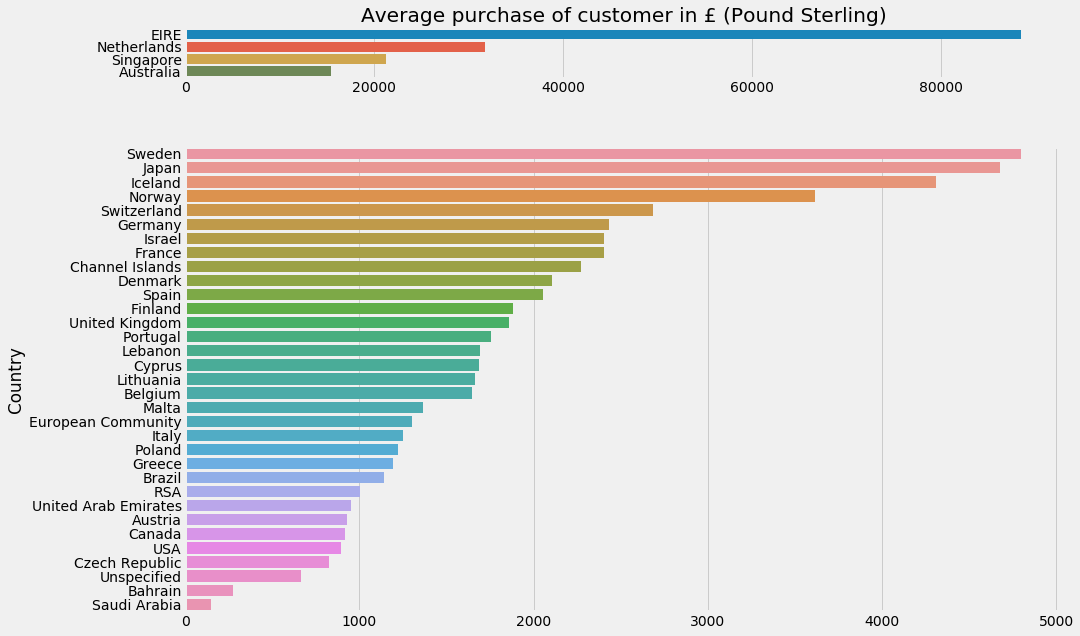

In [26]:
# plotting above data

plt.figure(figsize=(14, 10))
G = gridspec.GridSpec(10, 1)

axes_1 = plt.subplot(G[:1, :]); sns.barplot(x=acp[:4] ,y=acp.index[:4], orient='h')
plt.xlabel('')
plt.ylabel('')
plt.title(r'Average purchase of customer in £ (Pound Sterling)')
axes_2 = plt.subplot(G[2:, :]); sns.barplot(x=acp[4:] ,y=acp.index[4:], orient='h')
plt.xlabel('')
print('Graph showing average purchase of customers from different countries')


In [27]:
# checking the top ten spenders from the data

byCustomer = df.groupby('CustomerID').Amount.sum().reset_index()
top = byCustomer.Amount.sort_values(ascending=False)[:10]
top_ten_spender = {}
for i in range(top.shape[0]):
    top_ten_spender[byCustomer.CustomerID[int(top.index[i])]] = top.iloc[i].round(1)
print("The ten highest spenders are:\n\nCustomerID\tMoney Spent")
for cid, amount in top_ten_spender.items():
    print(f"{cid}\t\t{amount}")

The ten highest spenders are:

CustomerID	Money Spent
14646		280206.0
18102		259657.3
17450		194390.8
16446		168472.5
14911		143711.2
12415		124914.5
14156		117210.1
17511		91062.4
16029		80850.8
12346		77183.6


In [28]:
print("Total no. of items in the inventory is:")
df.Description.nunique()

Total no. of items in the inventory is:


3877

In [29]:
# most purchased items

print("\nThe top twenty most purchased items from the store with the no. of times they were purchased:")
top_twenty_items = df.Description.value_counts()[:20]
top_twenty_items


The top twenty most purchased items from the store with the no. of times they were purchased:


WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
LUNCH BAG RED RETROSPOT               1303
SET OF 3 CAKE TINS PANTRY DESIGN      1152
POSTAGE                               1099
LUNCH BAG  BLACK SKULL.               1078
PACK OF 72 RETROSPOT CAKE CASES       1050
SPOTTY BUNTING                        1014
PAPER CHAIN KIT 50'S CHRISTMAS        1003
LUNCH BAG SPACEBOY DESIGN              993
HEART OF WICKER SMALL                  979
LUNCH BAG CARS BLUE                    977
NATURAL SLATE HEART CHALKBOARD         972
LUNCH BAG PINK POLKADOT                941
LUNCH BAG SUKI DESIGN                  915
REX CASH+CARRY JUMBO SHOPPER           897
ALARM CLOCK BAKELIKE RED               886
Name: Description, dtype: int64

The top 20 bestsellers from the inventory


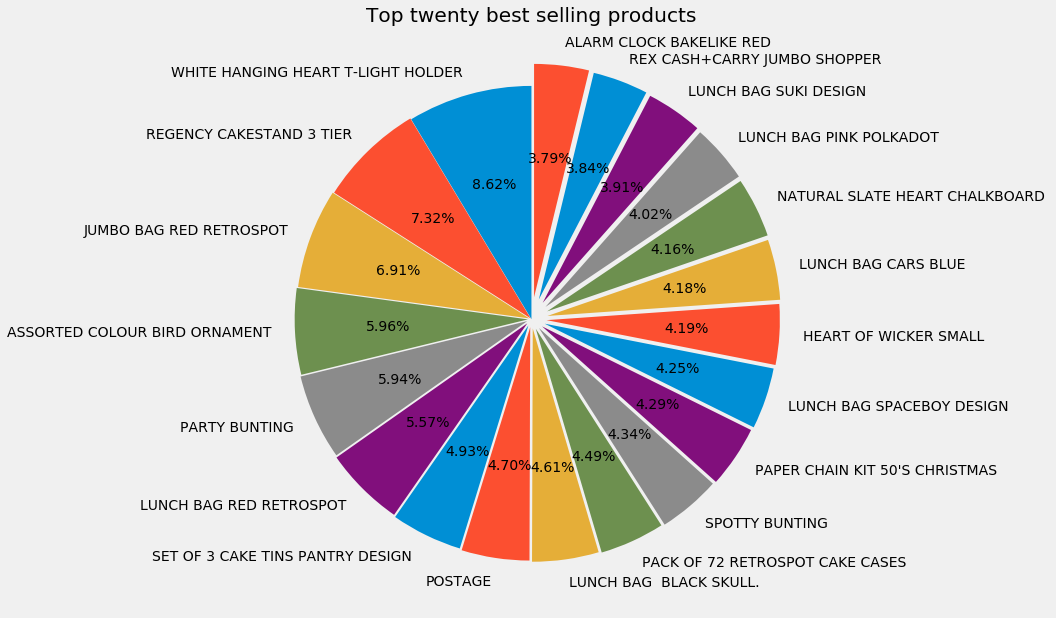

In [30]:
# plotting the top 20 most purchased items

plt.figure(figsize=(10,10))
plt.pie(top_twenty_items, labels=top_twenty_items.index, explode=[e*0.005 for e in range(20)], startangle=90, autopct='%1.2f%%')
plt.title('Top twenty best selling products')
plt.rc('figure', titlesize=30)  
print('The top 20 bestsellers from the inventory')

In [31]:
# least purchased items

print("\nThe least purchased items from the store are:")
df.Description.value_counts(ascending=True)[:20]


The least purchased items from the store are:


PINK PAINTED KASHMIRI CHAIR            1
PEARL & SHELL 42"NECKL. IVORY          1
ASSORTED COLOUR SILK GLASSES CASE      1
FLAG OF ST GEORGE CAR FLAG             1
RED ROSE AND LACE C/COVER              1
CAKE STAND LACE WHITE                  1
NEW BAROQUE B'FLY NECKLACE PINK        1
PINK MARSHMALLOW SCARF KNITTING KIT    1
PACK 4 FLOWER/BUTTERFLY PATCHES        1
ZINC PLANT POT HOLDER                  1
GLASS AND PAINTED BEADS BRACELET OL    1
BIG POLKADOT MUG                       1
PINK SMALL GLASS CAKE STAND            1
NEW BAROQUE B'FLY NECKLACE GREEN       1
SET/3 TALL GLASS CANDLE HOLDER PINK    1
WEEKEND BAG VINTAGE ROSE PAISLEY       1
STORAGE TIN VINTAGE DOILEY             1
WALL ART,ONLY ONE PERSON               1
SET OF 6 EASTER RAINBOW CHICKS         1
ANT SILVER TURQUOISE BOUDICCA RING     1
Name: Description, dtype: int64

# Calculating RFM score

In [32]:
# To calculate the recency parameter we'll need to calculate the duration
# since the last purchase by the customer

# So first setting a reference date
# Here we are taking one day after the last purchase from the dataset as a refrence date

ref_date = df.InvoiceDate.max() + dt.timedelta(days=1)
print('The reference date for our analysis would be:', ref_date)

The reference date for our analysis would be: 2011-12-10 12:50:00


In [33]:
# Finding the no. of days since the customer has not purchased at the store

r = df.groupby('CustomerID').InvoiceDate.max().reset_index().rename(columns={'InvoiceDate':'Last_Visit'})
r['Gap'] = r.Last_Visit.apply( lambda x : (ref_date - x).days)
r.head()

,CustomerID,Last_Visit,Gap
0,12346,2011-01-18 10:01:00,326
1,12347,2011-12-07 15:52:00,2
2,12348,2011-09-25 13:13:00,75
3,12349,2011-11-21 09:51:00,19
4,12350,2011-02-02 16:01:00,310


In [34]:
# dictionary storing CustomerID and Gap pairs
r_dict = {}
for i in range(r.shape[0]):
    r_dict[r.CustomerID[i]] = r.Gap[i]

# creating new column 'R_Score' with Recency score
df['R_Score'] = df.CustomerID.map(r_dict)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,R_Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,372
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,372
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372


In [35]:
# assessing the frequency of each Customer

f = df.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'No_Of_Visits'})
f.head()

,CustomerID,No_Of_Visits
0,12346,1
1,12347,7
2,12348,4
3,12349,1
4,12350,1


In [36]:
# dictionary storing CustomerID and thier frequency pairs
f_dict = {}
for i in range(f.shape[0]):
    f_dict[f.CustomerID[i]] = f.No_Of_Visits[i]
    
# creating new column 'F_Score' with Frequency score
df['F_Score'] = df.CustomerID.map(f_dict)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,R_Score,F_Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,372,34
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372,34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,372,34
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372,34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372,34


In [37]:
# assessing the amount spent by each Customer

m = df.groupby('CustomerID').Amount.sum().reset_index().rename(columns={'Amount':'Total_Purchase'})
m.head()

,CustomerID,Total_Purchase
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


In [38]:
# dictionary storing CustomerID and thier spenditure pairs
m_dict = {}
for i in range(m.shape[0]):
    m_dict[m.CustomerID[i]] = m.Total_Purchase[i]
    
# creating new column 'M_Score' with Monetary score
df['M_Score'] = df.CustomerID.map(m_dict)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,R_Score,F_Score,M_Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,372,34,5391.21
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372,34,5391.21
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,372,34,5391.21
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372,34,5391.21
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,372,34,5391.21


In [39]:
# importing Standard Scaler to normalize the values of R, F and M
from sklearn.preprocessing import MinMaxScaler
mnmx = MinMaxScaler()

# normalizing 'R_Score', 'F_Score' and 'M_Score'
df.iloc[:, 9:12] = mnmx.fit_transform(df.iloc[:, 9:12])

In [40]:
# since max value of 'R_Score' is 1
# Subtracting all 'R_Score' values with 1
# because the less is the no. of days since last purchase; the more should be the score

df.R_Score = df.R_Score.apply(lambda x : 1.0-x)

In [41]:
# finally calculating 'RFM' by adding 'R_Score', 'F_Score' and 'M_Score'

df['RFM'] = df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1).round(2)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,R_Score,F_Score,M_Score,RFM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0.005362,0.158654,0.019227,0.18
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0.005362,0.158654,0.019227,0.18
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0.005362,0.158654,0.019227,0.18
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0.005362,0.158654,0.019227,0.18
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0.005362,0.158654,0.019227,0.18


distplot of R_Score, F_Score and M_Score


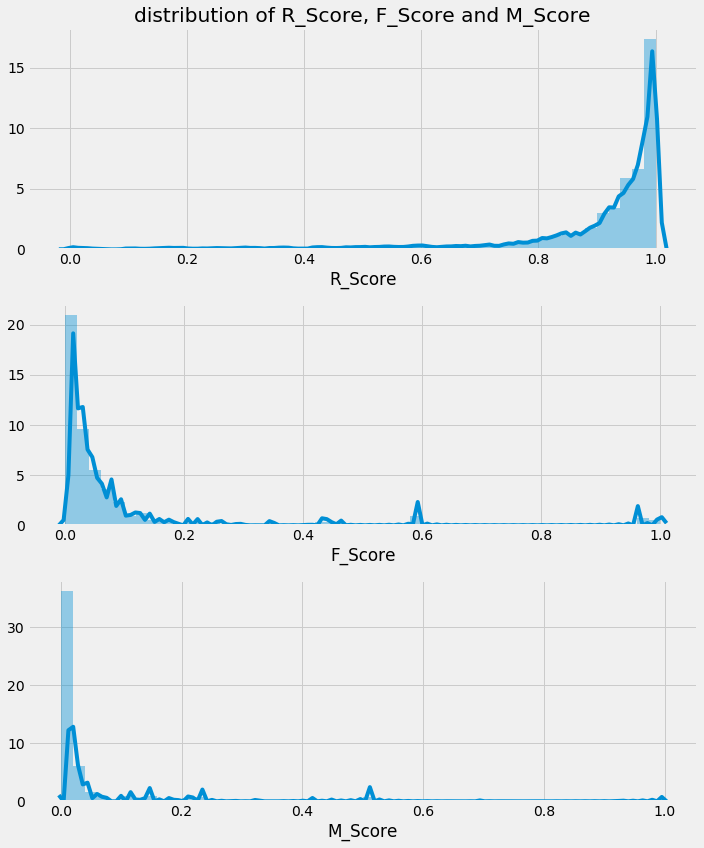

In [42]:
# plotting the distribution of RFM values

f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(df.R_Score, label = 'Recency')
plt.title('distribution of R_Score, F_Score and M_Score')
plt.subplot(3, 1, 2); sns.distplot(df.F_Score, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(df.M_Score, label = 'Monetary Value')
plt.tight_layout()
print('distplot of R_Score, F_Score and M_Score')

distplot of RFM Score of the customers


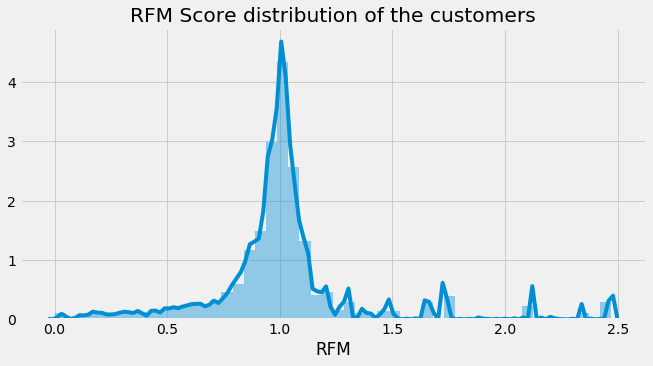

In [43]:
# distplot of RFM Score

plt.figure(figsize=(10, 5))
sns.distplot(df.RFM)
plt.title('RFM Score distribution of the customers')
print('distplot of RFM Score of the customers')

# Segmentation

In [44]:
# Now performing segmentation on the basis of the calculated RFM score

def assignSegment(x):
    if x >= 2.0:
        return 'Tier1'
    elif x >= 1.5 and x < 2.0:
        return 'Tier2'
    elif x >= 1.0 and x < 1.5:
        return 'Tier3'
    elif x >=0.5 and x < 1.0:
        return 'Tier4'
    elif x >= 0.0 and x <0.5:
        return 'Tier5'

# adding segment to each entry

df['RFM_Segment'] = df.RFM.apply(assignSegment)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,R_Score,F_Score,M_Score,RFM,RFM_Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,0.005362,0.158654,0.019227,0.18,Tier5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0.005362,0.158654,0.019227,0.18,Tier5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,0.005362,0.158654,0.019227,0.18,Tier5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0.005362,0.158654,0.019227,0.18,Tier5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,0.005362,0.158654,0.019227,0.18,Tier5


In [45]:
# pulling stats from the different segments

segment_stats = df.groupby('RFM_Segment').agg({'CustomerID':'count', 'Amount':'sum', 'RFM':'mean'})
segment_stats = segment_stats.rename(columns={'CustomerID':'No_Of_Customers', 'Amount':'Total_Purchased_Value', 'RFM':'RFM (mean)'})
segment_stats['Avg_Purchase'] = (segment_stats.Total_Purchased_Value / segment_stats.No_Of_Customers).round(2)
segment_stats

,No_Of_Customers,Total_Purchased_Value,RFM (mean),Avg_Purchase
RFM_Segment,,,,
Tier1,12589,716627.680,2.316998,56.92
Tier2,13590,639988.040,1.703781,47.09
Tier3,180009,4223074.640,1.089492,23.46
Tier4,167411,2873978.713,0.874628,17.17
Tier5,19093,433539.821,0.277660,22.71


Pie chart showing size of different segments


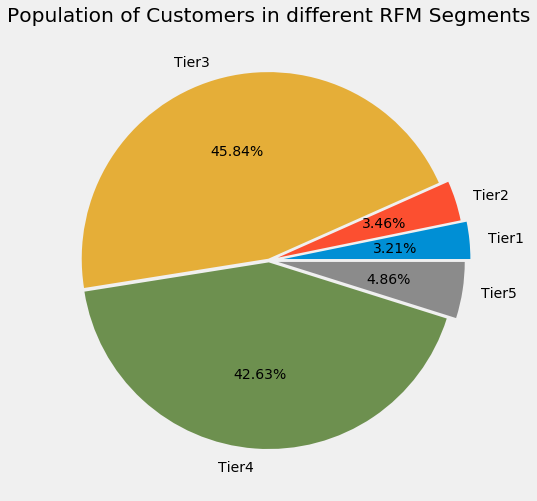

In [46]:
# plotting the population from different segments

plt.figure(figsize=(8,8))
plt.pie(segment_stats.No_Of_Customers, labels=segment_stats.index, explode=[0.08,0.05,0.01,0.01,0.05], autopct='%1.2f%%')
plt.title('Population of Customers in different RFM Segments')
print('Pie chart showing size of different segments')

Pie chart showing the total purchased value from different segments


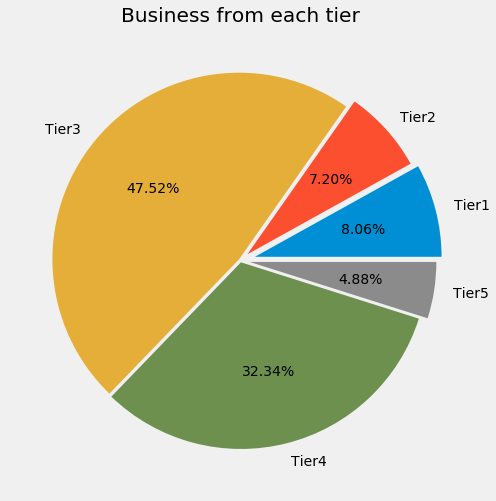

In [47]:
# visualizing the percentage of business from each tier

plt.figure(figsize=(8,8))
plt.pie(segment_stats.Total_Purchased_Value, labels=segment_stats.index, explode=[0.08,0.05,0.01,0.01,0.05], autopct='%1.2f%%')
plt.title('Business from each tier')
print('Pie chart showing the total purchased value from different segments')

Figure showing average purchase in pounds, from an average person from different Tiers


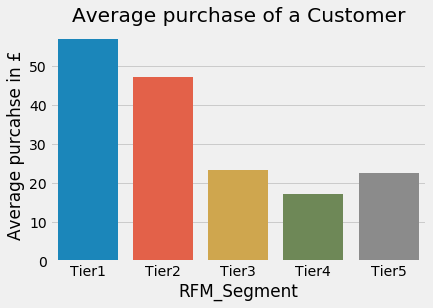

In [48]:
# plotting average purchase from any customer from different Tiers

sns.barplot(x=segment_stats.index, y=segment_stats.Avg_Purchase)
plt.ylabel(r'Average purcahse in £')
plt.title('Average purchase of a Customer')
print('Figure showing average purchase in pounds, from an average person from different Tiers')

Mean of RFM Score of the different segments


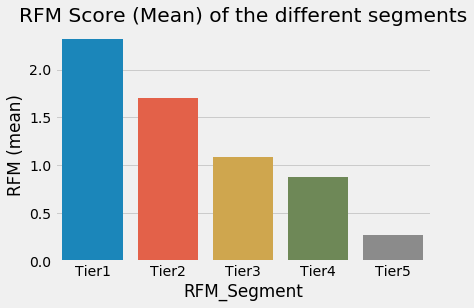

In [49]:
# plotting the mean value of RFM score for each segment

sns.barplot(x=segment_stats.index, y=segment_stats.iloc[:,2])
plt.title('RFM Score (Mean) of the different segments')
print('Mean of RFM Score of the different segments')